# _GLOBAL STORE_

- ### Almir 

- ### Dani
- ### Mariana 
- ### Tan

In [ ]:
Instalação das bibliotecas
pip install pandas
pip install seaborn
pip install plotly
pip install jupyter-plotly-dash

# Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go

from jupyter_plotly_dash import JupyterDash
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [2]:
from IPython.display import HTML
import random

def esconder(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Abrir/Esconder'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <form action="javascript:{f_name}()"><input type="submit" value="Mostrar / Esconder"></form>
        
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

## Data Set

In [3]:
orders = pd.read_excel('Global Superstore.xls', sheet_name = 0 )
#orders.dtypes
orders.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Sales and Profit by Year

In [4]:
orders["Order_Year"] = pd.to_datetime(orders["Order Date"])
orders["Year"] = orders["Order_Year"].dt.year
year_sales_profit = orders.groupby("Year").agg({"Sales":np.sum, "Profit": np.sum})
year_sales_profit

,Sales,Profit
Year,,
2011,2.259451e+06,248940.81154
2012,2.677439e+06,307415.27910
2013,3.405746e+06,406935.23018
2014,4.299866e+06,504165.97046


In [5]:
esconder(next)

In [44]:
years = year_sales_profit.index

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=year_sales_profit['Sales'],
                name='Sales by Year',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=year_sales_profit['Profit'],
                name='Profit by Year',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Sales x Profit by Year',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Total Sales and Profits',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1
)
fig.show()

## Sankey diagram - Flow from Market to Ship Mode

In [7]:
df1 = orders.filter(['Ship Mode','Segment','Market','Category','Sub-Category','Profit'], axis=1)
df1.head()

,Ship Mode,Segment,Market,Category,Sub-Category,Profit
0,Same Day,Consumer,US,Technology,Accessories,762.1845
1,Second Class,Corporate,APAC,Furniture,Chairs,-288.7650
2,First Class,Consumer,APAC,Technology,Phones,919.9710
3,First Class,Home Office,EU,Technology,Phones,-96.5400
4,Same Day,Consumer,Africa,Technology,Copiers,311.5200


In [8]:
df2=df1.groupby(['Market', 'Segment'], as_index=False)['Profit'].count()
df2.head()
df3=df1.groupby(['Segment', 'Category'], as_index=False)['Profit'].count()
df3.head()
df4=df1.groupby(['Category','Sub-Category'], as_index=False)['Profit'].count()
df4.head()
df5=df1.groupby(['Sub-Category','Ship Mode'], as_index=False)['Profit'].count()
df5.head()
df2.columns = ['A', 'B', 'Quantity']
df3.columns = ['A', 'B', 'Quantity']
df4.columns = ['A', 'B', 'Quantity']
df5.columns = ['A', 'B', 'Quantity']
df6 = df2.append(df3)
df7 = df6.append(df4)
df8 = df7.append(df5)
df8

,A,B,Quantity
0,APAC,Consumer,5699
1,APAC,Corporate,3283
2,APAC,Home Office,2020
3,Africa,Consumer,2381
4,Africa,Corporate,1312
...,...,...,...
63,Supplies,Standard Class,1429
64,Tables,First Class,139
65,Tables,Same Day,34
66,Tables,Second Class,171


In [9]:
esconder(next)

In [42]:
def diagramSankey(df,cat_cols=[],value_cols='',title=''):
    colorPalette = ['#00FF33','#646464','#FFD43B','#4B8BBE','#306998','#2980B9','#262C46',]
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates
    labelList = list(dict.fromkeys(labelList))
    
    # define colors
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node = dict(
            pad = 30,
            thickness = 15,
            line = dict(
                    color = "black",
                    width = 0.7
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
    )])
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig.update_layout(title='Sankey Diagram >> Sales', font_size=14)

    return fig

fig = diagramSankey(df8, cat_cols=['A','B'],value_cols='Quantity')
fig.show()

In [11]:
orders = pd.read_excel('Global Superstore.xls', sheet_name = 0 )
#cria coluna "Year"
orders["Year"] = orders["Order Date"].apply(lambda x: (str(x))[0:4])
#Sales by Market
sales_by_market = orders.groupby(by = (orders["Year"], orders["Market"]))["Sales"].sum()
sales_Year_Market = sales_by_market.reset_index()
sales_Year_Market

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



,Year,Market,Sales
0,2011,APAC,6.392453e+05
1,2011,Africa,1.271873e+05
2,2011,Canada,8.509110e+03
3,2011,EMEA,1.364203e+05
4,2011,EU,4.787433e+05
5,2011,LATAM,3.850982e+05
6,2011,US,4.842475e+05
7,2012,APAC,7.627193e+05
8,2012,Africa,1.444807e+05
9,2012,Canada,1.609680e+04


In [12]:
#Profit by Market
profit_by_market = orders.groupby(by = (orders["Year"], orders["Market"]))["Profit"].sum()
profit_Year_Market = profit_by_market.reset_index()
profit_Year_Market

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



,Year,Market,Profit
0,2011,APAC,83031.57540
1,2011,Africa,10944.11400
2,2011,Canada,1807.08000
3,2011,EMEA,5280.03000
4,2011,EU,61625.62200
5,2011,LATAM,36708.41604
6,2011,US,49543.97410
7,2012,APAC,89410.85040
8,2012,Africa,11908.93500
9,2012,Canada,4887.84000


#### Gráfico de linha Sales By Market 

In [13]:
esconder(next)

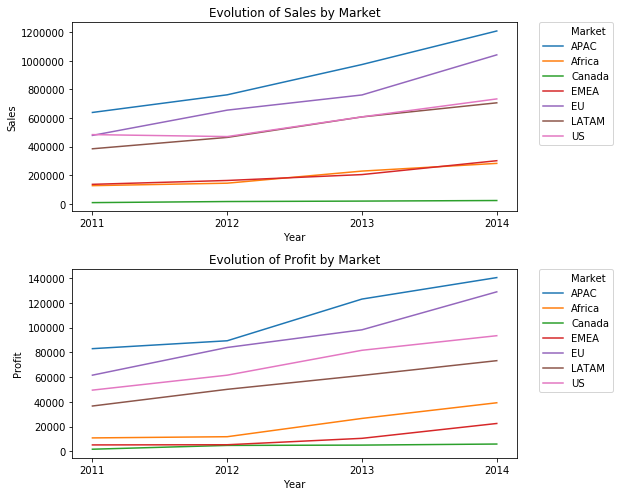

In [14]:
#Gráfico de linha Sales By Market 
plt.figure(figsize = (15, 7))
plt.subplot(2, 2, 1)
plt.title("Evolution of Sales by Market")
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Market", data = sales_Year_Market) #evolution of sales by market
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#Gráfico de linha Profit By Market
plt.subplot(2, 2, 3)
plt.title("Evolution of Profit by Market")
ax = sns.lineplot(x = "Year", y = "Profit", hue = "Market", data = profit_Year_Market) #evolution of profit by market
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()

In [15]:
temp = orders.groupby(by = ("Year", "Country"))["Sales"].sum()
annual_sales_country = temp.reset_index()
annual_sales_country

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



,Year,Country,Sales
0,2011,Afghanistan,1729.41000
1,2011,Albania,1707.54000
2,2011,Algeria,8539.80000
3,2011,Angola,6416.91000
4,2011,Argentina,8739.30512
...,...,...,...
532,2014,Venezuela,10059.60312
533,2014,Vietnam,19246.86390
534,2014,Yemen,448.71300
535,2014,Zambia,5398.62000


In [16]:
#filtrando apenas os top10 de cada ano
sales_2011 = annual_sales_country[annual_sales_country["Year"] == "2011"]
top10_2011 = sales_2011.sort_values(['Sales'], ascending=False).head(10)

sales_2012 = annual_sales_country[annual_sales_country["Year"] == "2012"]
top10_2012 = sales_2012.sort_values(['Sales'], ascending=False).head(10)

sales_2013 = annual_sales_country[annual_sales_country["Year"] == "2013"]
top10_2013 = sales_2013.sort_values(['Sales'], ascending=False).head(10)

sales_2014 = annual_sales_country[annual_sales_country["Year"] == "2014"]
top10_2014 = sales_2014.sort_values(['Sales'], ascending=False).head(10)
#planilha completa com os top10
top10_sales = pd.concat([top10_2011, top10_2012, top10_2013, top10_2014])
top10_sales

,Year,Country,Sales
125,2011,United States,484247.49810
24,2011,China,155693.61300
6,2011,Australia,137580.06000
40,2011,France,128194.51500
73,2011,Mexico,111361.04820
42,2011,Germany,110006.78100
51,2011,India,91396.00500
124,2011,United Kingdom,86188.55100
52,2011,Indonesia,62253.48210
16,2011,Brazil,57019.66100


#### Top10

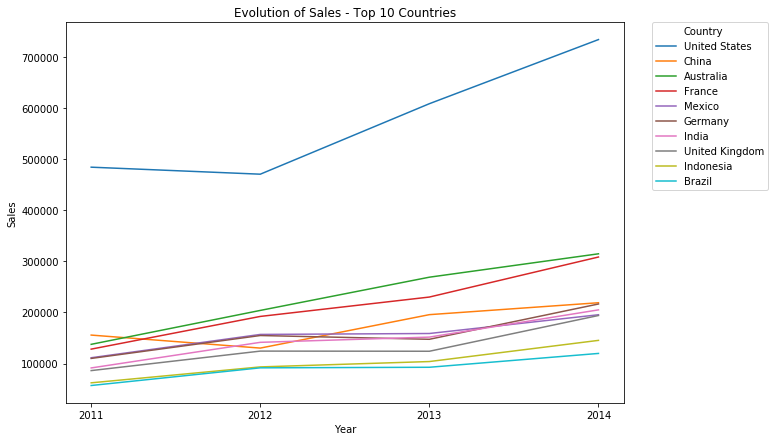

In [17]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 1, 1)
plt.title("Evolution of Sales - Top 10 Countries")
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Country", data = top10_sales) #evolution of sales - top 10 countries
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


## Distribuição de Sales por País por Ano - Com Outliers

In [18]:
esconder(next)

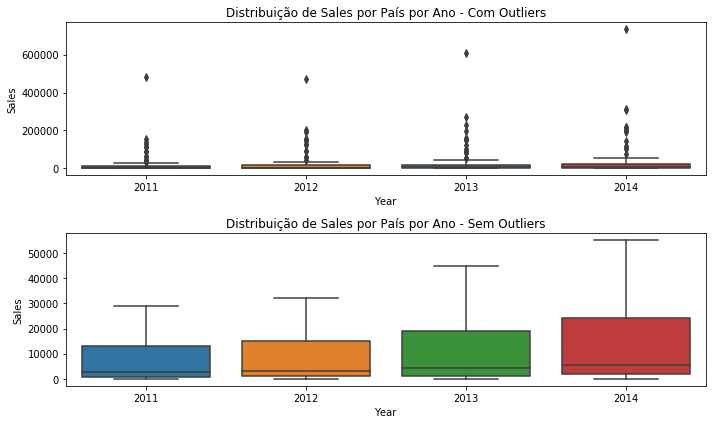

In [19]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
ax1 = sns.boxplot(x = "Year", y = "Sales", data = annual_sales_country)
plt.title("Distribuição de Sales por País por Ano - Com Outliers")

plt.subplot(2, 1, 2)
ax2 = sns.boxplot(x = "Year", y = "Sales", data = annual_sales_country, showfliers = False)
plt.title("Distribuição de Sales por País por Ano - Sem Outliers")
plt.tight_layout()

In [20]:
temp = orders.groupby(by = ("Year", "Country"))["Profit"].sum()
annual_profit_country = temp.reset_index()
annual_profit_country

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



,Year,Country,Profit
0,2011,Afghanistan,293.94000
1,2011,Albania,267.54000
2,2011,Algeria,1736.31000
3,2011,Angola,1015.71000
4,2011,Argentina,-2468.73488
...,...,...,...
532,2014,Venezuela,-3753.15688
533,2014,Vietnam,-488.99610
534,2014,Yemen,-730.10700
535,2014,Zambia,1665.78000


In [21]:
#filtrando apenas os top10 de cada ano
profit_2011 = annual_profit_country[annual_profit_country["Year"] == "2011"]
ptop10_2011 = profit_2011.sort_values(['Profit'], ascending=False).head(10)

profit_2012 = annual_profit_country[annual_profit_country["Year"] == "2012"]
ptop10_2012 = profit_2012.sort_values(['Profit'], ascending=False).head(10)

profit_2013 = annual_profit_country[annual_profit_country["Year"] == "2013"]
ptop10_2013 = profit_2013.sort_values(['Profit'], ascending=False).head(10)

profit_2014 = annual_profit_country[annual_profit_country["Year"] == "2014"]
ptop10_2014 = profit_2014.sort_values(['Profit'], ascending=False).head(10)

In [22]:
#planilha completa com os top10
top10_profit = pd.concat([ptop10_2011, ptop10_2012, ptop10_2013, ptop10_2014])
top10_profit

,Year,Country,Profit
125,2011,United States,49543.97410
24,2011,China,33181.38300
124,2011,United Kingdom,20080.22100
51,2011,India,19928.50500
42,2011,Germany,19554.86100
73,2011,Mexico,18521.74820
40,2011,France,18435.67500
6,2011,Australia,17516.73000
36,2011,El Salvador,9168.00024
107,2011,Spain,8644.84500


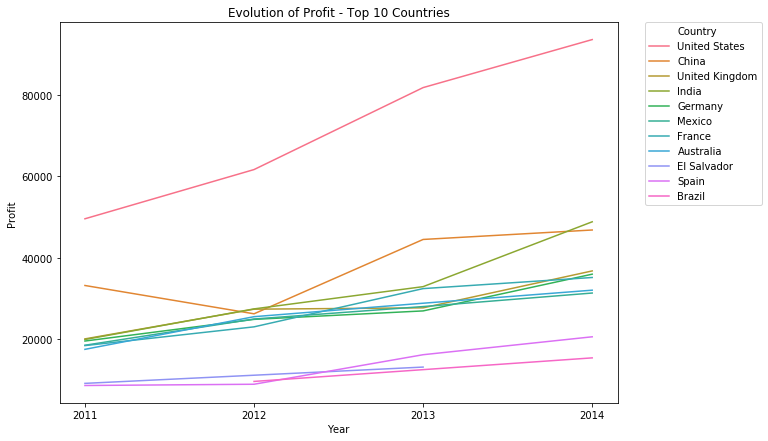

In [23]:
plt.figure(figsize = (10, 7))
plt.subplot(1, 1, 1)
plt.title("Evolution of Profit - Top 10 Countries")
ax = sns.lineplot(x = "Year", y = "Profit", hue = "Country", data = top10_profit) #evolution of sales - top 10 countries
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [24]:
esconder(next)

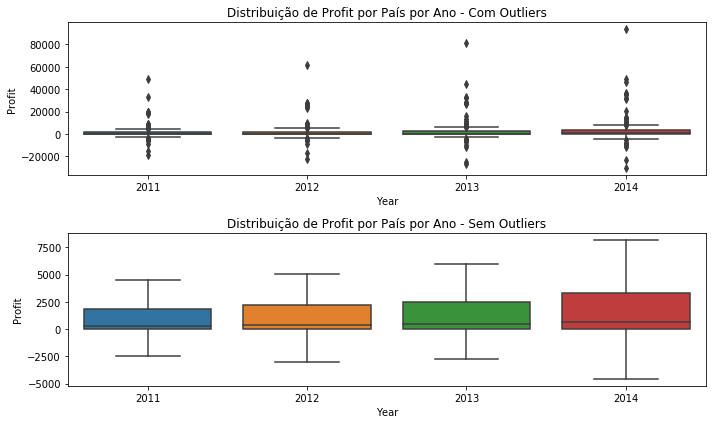

In [25]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
ax1 = sns.boxplot(x = "Year", y = "Profit", data = annual_profit_country)
plt.title("Distribuição de Profit por País por Ano - Com Outliers")

plt.subplot(2, 1, 2)
ax2 = sns.boxplot(x = "Year", y = "Profit", data = annual_profit_country, showfliers = False)
plt.title("Distribuição de Profit por País por Ano - Sem Outliers")
plt.tight_layout()

In [26]:
orders = pd.read_excel('Global Superstore.xls', sheet_name = 0 )

In [27]:
import pycountry

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

orders['Sigla'] = [countries.get(country, 'Desconhecido') for country in orders['Country']]
orders['Ano'] = pd.to_datetime(orders['Order Date'], format='%d/%m/%Y').dt.year
ordersgroup=orders.groupby(['Ano','Sigla','Country']).sum().reset_index()

In [45]:
import plotly.express as px
orders2= orders.query("Ano==2014")
fig = px.choropleth(ordersgroup, locations="Sigla", color="Profit", hover_name="Country", 
                    animation_frame="Ano", range_color=[-1000,5000],color_continuous_scale='ylorbr')
fig.update_layout(
    title_text='Lucro por País (em geral de 2011 a 2014)')
fig.show()

In [29]:
ordersgroup['Sales'].max()

733947.0231999967

In [46]:
import plotly.express as px
fig = px.choropleth(ordersgroup, locations="Sigla", color="Sales", hover_name="Country", 
                    animation_frame="Ano", range_color=[0,400000],color_continuous_scale='rdylgn')

fig.update_layout(
    title_text='Vendas por País (em geral de 2011 a 2014)')
fig.show()

In [31]:
df = pd.read_excel('Global Superstore.xls', sheet_name = 0 )
dff = df[(df['Category'] == 'Furniture') & (df['Sub-Category'] == 'Chairs')]
sales_cat_subcat = df.groupby(['Category', 'Sub-Category'])['Sales'].sum()
grouped_data = dict(tuple(sales_cat_subcat.groupby('Category')))

In [40]:
esconder(next)

In [41]:

app = JupyterDash('Trabalho')
all_options = grouped_data

app.layout = html.Div([
    html.H1("Sales By Category and Sub-Category", style={"textAlign": "center"}),
    html.Div([
        html.Div([dcc.Dropdown(id='category',
            options=[{'label': k, 'value': k} for k in all_options.keys()],
            value=list(all_options.keys())[0])], className="six columns",
                       style={"width": "40%", "float": "left"}),
        html.Div([dcc.Dropdown(id='sub_category')], className="six columns", style={"width": "40%", "float": "right"}),
    ], className="row", style={"padding": 5, "width": "60%", "margin-left": "auto", "margin-right": "auto"}),
    html.Div(id='output'),
    html.Div([
        html.Div([dcc.Graph(id='g1')], className="six columns",
                       style={"width": "50%","float": "left"}),
        html.Div([dcc.Graph(id='g2')], className="six columns", style={"width": "50%","float": "right"}),
    ], className="row", style={"padding": 2,"margin-left": "auto", "margin-right": "auto"})
       
])


@app.callback(
    dash.dependencies.Output('sub_category', 'options'),
    [dash.dependencies.Input('category', 'value')])
def update_output(value):
    sub_categ = [{'label': k[1], 'value': k[1]} for k in all_options[value].keys()]
    return sub_categ

@app.callback(
    Output('sub_category', 'value'),
    [Input('sub_category', 'options')])

def set_category_value(available_options):
    return available_options[0]['value']

@app.callback(
    dash.dependencies.Output('g2', 'figure'),
    [dash.dependencies.Input('category', 'value'),
     dash.dependencies.Input('sub_category', 'value')])

def update_graph2(selected_cat, selected_sub):
    dff = df[(df['Category'] == selected_cat) & (df['Sub-Category'] == selected_sub)]
    dff['Year'] = pd.to_datetime(dff['Order Date'], format='%d/%m/%Y').dt.year

    trace2 = go.Bar(x=dff['Year'], y=dff['Sales'], name=selected_sub.title(), )
    
    return {
        'data': [trace2],
        'layout': go.Layout(title=f'Sales by Sub-Category: {selected_sub.title()}',
                            colorway=["#EF963B", "#EF533B"], hovermode="closest")}

@app.callback(
    dash.dependencies.Output('g1', 'figure'),
    [dash.dependencies.Input('category', 'value'),
     dash.dependencies.Input('sub_category', 'value')])
def update_graph(selected_cat, selected_sub):
    dff = df[(df['Category'] == selected_cat)]
    dff['Year'] = pd.to_datetime(dff['Order Date'], format='%d/%m/%Y').dt.year
    trace1 = go.Bar(x=dff['Year'], y=dff['Sales'], name=selected_cat.title(), )
    #trace1 = go.Scatter(x=dff['Year'], y=dff['Sales'], mode = 'markers')
    return {
        'data': [trace1],
        'layout': go.Layout(title=f'Sales by Category: {selected_cat.title()}',
                            colorway=["#17A589", "#A3E4D7"], hovermode="closest")}

app
